<a href="https://colab.research.google.com/github/elvinkoo98/fyp/blob/main/UUMDAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/107.7 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="agyebRveMeMhTtKjITUI")
project = rf.workspace("ege-yuceel").project("data_with_july2022")
version = project.version(5)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.58, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to data_with_july2022-5 in yolov8:: 100%|██████████| 3266/3266 [00:00<00:00, 5119.70it/s]


In [3]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/data_with_july2022-5/data.yaml epochs=10 imgsz=640

100% 6.25M/6.25M [00:00<00:00, 22.6MB/s]
Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data_with_july2022-5/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

In [4]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/data_with_july2022-5/data.yaml

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/data_with_july2022-5/valid/labels.cache... 215 images, 27 backgrounds, 0 corrupt: 100% 215/215 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [01:17<00:00,  5.56s/it]
                   all        215        272      0.743      0.548      0.625      0.322
               metalic        167        172      0.785       0.61      0.753       0.36
          non-metallic         29         46      0.626      0.182       0.28      0.159
            nonmetalic         50         54      0.819      0.852      0.843      0.447
Speed: 8.1ms preprocess, 339.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [5]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt source=/content/data_with_july2022-5/test/images

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs

image 1/211 /content/data_with_july2022-5/test/images/Survey_2021-05-18_001-LA010003_png.rf.3163eedad599024fae2539d67da815e8.jpg: 640x640 (no detections), 262.4ms
image 2/211 /content/data_with_july2022-5/test/images/Survey_2021-05-18_001-LA030002_png.rf.17f7674224d81c42dd5946eb8137d385.jpg: 640x640 (no detections), 211.5ms
image 3/211 /content/data_with_july2022-5/test/images/Survey_2021-05-18_002-LA030001_png.rf.2e4a3a50408f9ec91f4a1cb8427d3305.jpg: 640x640 (no detections), 197.9ms
image 4/211 /content/data_with_july2022-5/test/images/Survey_2021-05-20_001-LA020002_png.rf.30801289463c156b0a8977a36a72b7e0.jpg: 640x640 (no detections), 216.9ms
image 5/211 /content/data_with_july2022-5/test/images/Survey_2021-05-20_002-LA010001_png.rf.d887f1360e3ebff0cc59b29b0490b690.jpg: 640x640 (no detections), 215.0ms
image 6/211 /conten

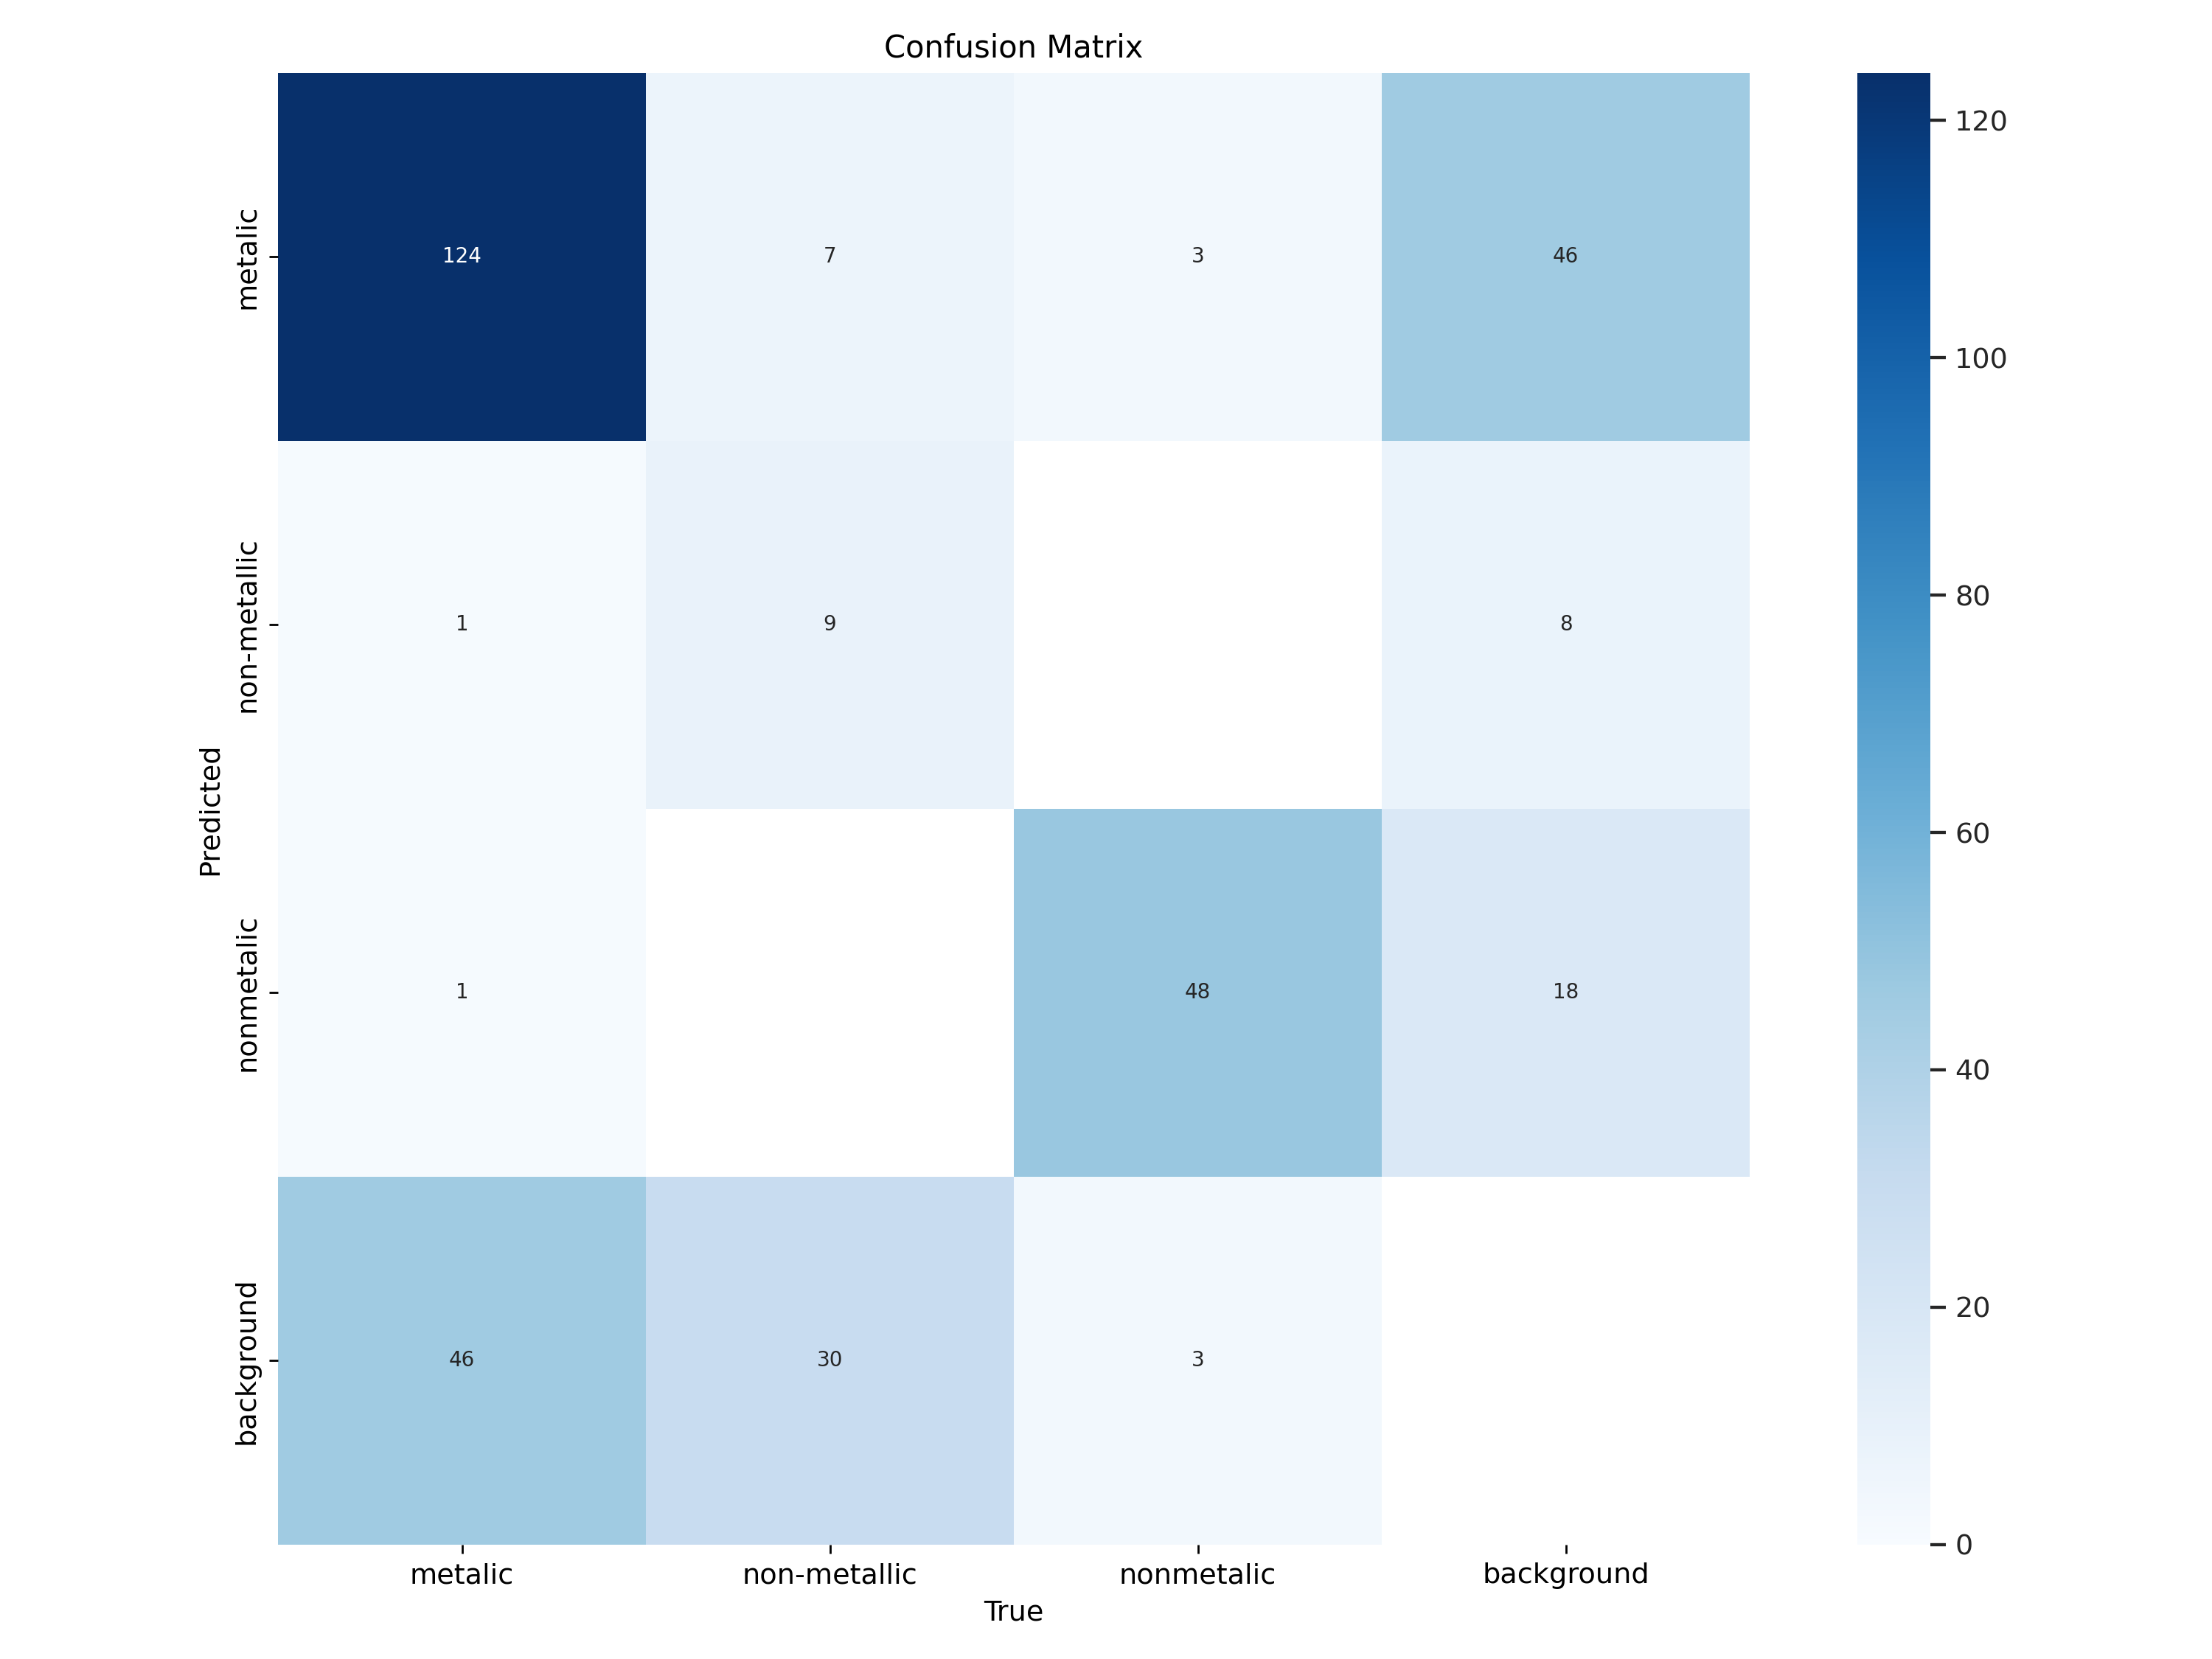

In [17]:
from IPython.display import Image, display

# Path to the confusion matrix image
image_path = '/content/runs/detect/train/confusion_matrix.png'

# Display the image
display(Image(filename=image_path, width=600))


In [19]:

# Load a pre-trained model
model = YOLO('yolov8n.pt')


In [21]:
model.save('best.pt')

In [23]:
from google.colab import files
files.download(save_path)

NameError: name 'save_path' is not defined

In [22]:
# Validate the trained model
results = model.val()
print(results)


Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:15<00:00, 318.28it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [20:26<00:00,  3.92s/it]


                   all       5000      36335      0.633      0.475      0.521      0.371
                person       2693      10777      0.754      0.673      0.745      0.514
               bicycle        149        314      0.687      0.392      0.457      0.265
                   car        535       1918      0.646      0.515      0.561      0.364
            motorcycle        159        367       0.71       0.58      0.655      0.414
              airplane         97        143      0.814      0.766      0.832      0.653
                   bus        189        283      0.746      0.643      0.739       0.62
                 train        157        190      0.798       0.77      0.834      0.646
                 truck        250        414      0.549      0.399      0.435      0.293
                  boat        121        424      0.583        0.3      0.377       0.21
         traffic light        191        634      0.644      0.345      0.409      0.211
          fire hydran

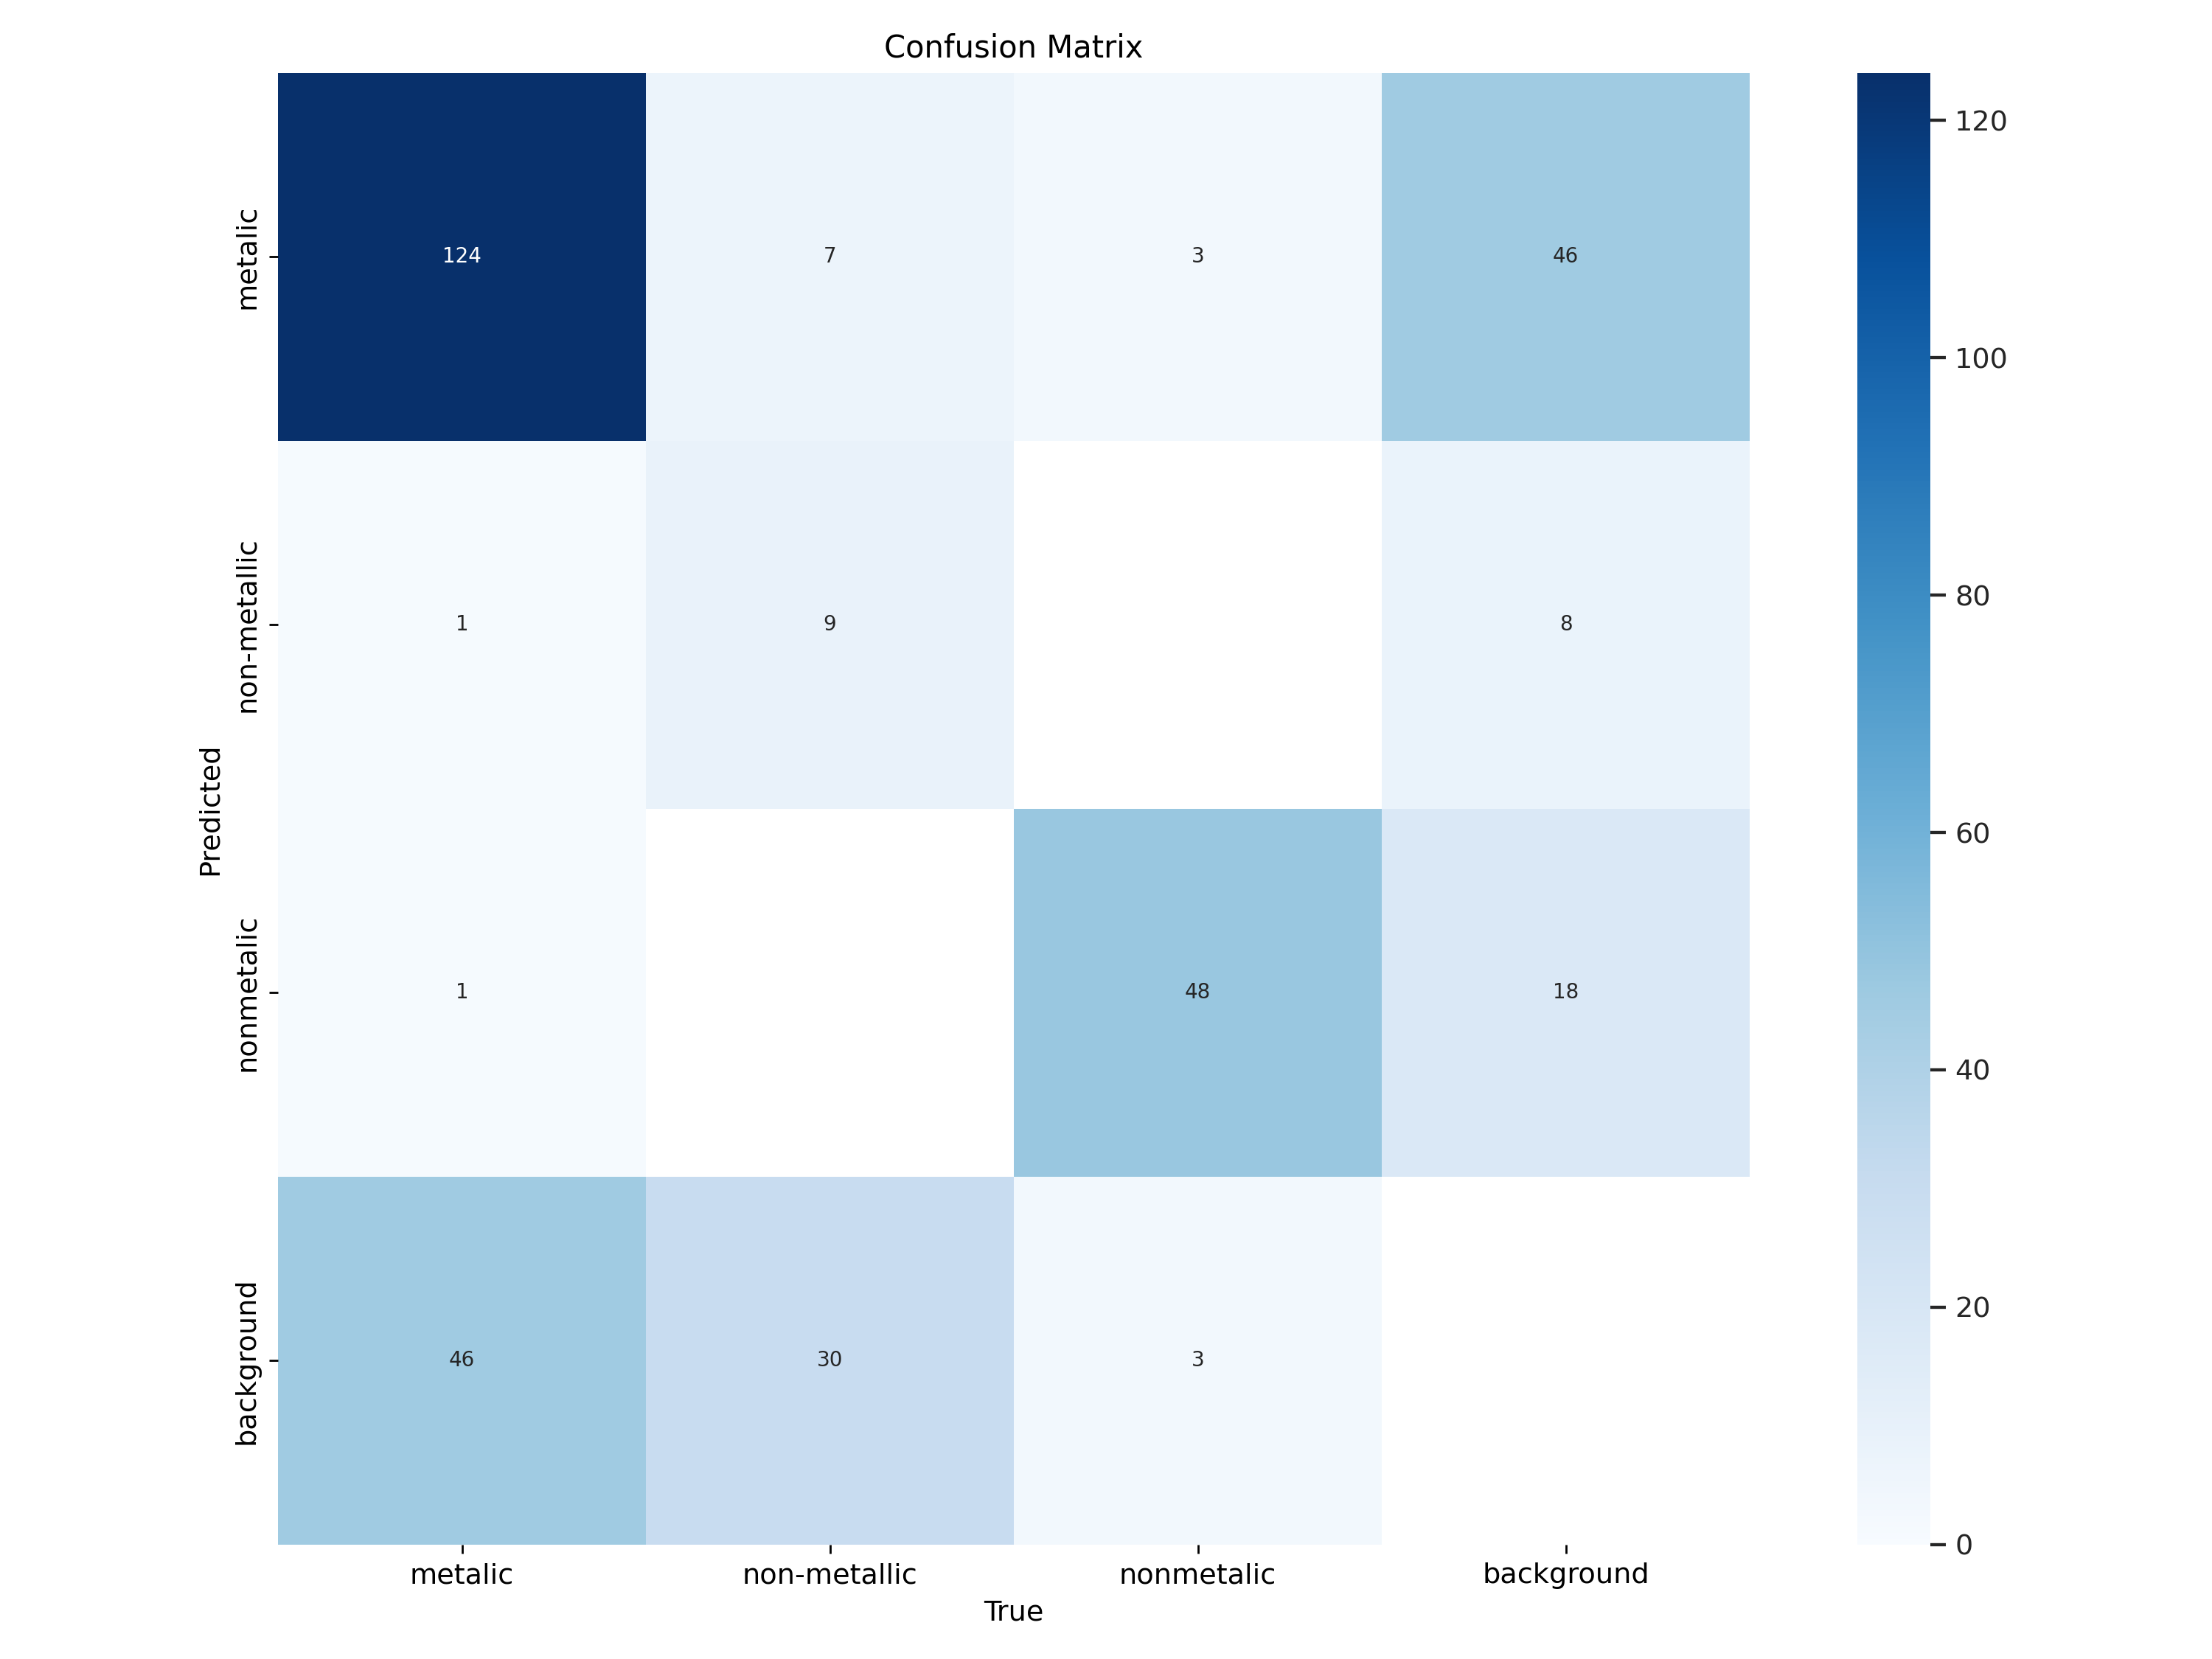

In [24]:
from IPython.display import Image, display

# Path to the confusion matrix image
image_path = '/content/runs/detect/train/confusion_matrix.png'

# Display the image
display(Image(filename=image_path, width=600))


In [25]:
!pip install flask flask-ngrok ultralytics pillow

In [ ]:
from flask import Flask, request, render_template_string
from flask_ngrok import run_with_ngrok
from ultralytics import YOLO
from PIL import Image
import io

app = Flask('UUMDAI')
run_with_ngrok(app)  # Start ngrok when app is run
model = YOLO('best.pt')

@app.route('/')
def index():
    return '''
    <!DOCTYPE html>
    <html lang="en">
    <head>
        <meta charset="UTF-8">
        <title>Upload and Predict</title>
    </head>
    <body>
        <h1>Upload an Image for Prediction</h1>
        <form action="/predict" method="post" enctype="multipart/form-data">
            <input type="file" name="file" accept="image/*">
            <input type="submit" value="Upload">
        </form>
    </body>
    </html>
    '''

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return 'No file uploaded', 400

    file = request.files['file']
    img = Image.open(io.BytesIO(file.read()))
    results = model.predict(img)

    # Process results
    predictions = results.pandas().xyxy[0].to_json(orient='records')
    return predictions

app.run()


 * Serving Flask app 'UUMDAI'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-31:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 203, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 791, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll